# Escuela Politécnica Nacional
## Métodos Numericos
### Isaac González
#### 05/11/2025

---

# Tarea 5

Conjunto de ejercicios

1. Sea $f(x) = -x^3-cosx$ y $p_0 = -1$. use el método de Newton y de la Secante para encontrar $p_2$. ¿Se podría usar $p_0 = 0$ 

In [1]:
import numpy as np
from scipy.optimize import newton

def funcion(x):
    return -x**3 - np.cos(x)

def derivada_funcion(x):
    return -3 * x**2 + np.sin(x)

inicio = -1
raiz_newton_1 = newton(funcion, fprime=derivada_funcion, x0=inicio)
print(f"Raíz obtenida con el método de Newton: {raiz_newton_1}")

raiz_secante_1 = newton(funcion, x0=-1, x1=0)
print(f"Raíz obtenida con el método de la Secante: {raiz_secante_1}")

x_inicial_1 = 0
x_inicial_2 = 1
print("Usando x0 = 0 como punto inicial:")

try:
    raiz_newton_2 = newton(funcion, fprime=derivada_funcion, x0=x_inicial_1)
    print(f"Raíz encontrada con Newton: {raiz_newton_2}")
except RuntimeError:
    print(f"El método de Newton no converge con x0 = {x_inicial_1}")

try:
    raiz_secante_2 = newton(funcion, x0=x_inicial_1, x1=x_inicial_2)
    print(f"Raíz encontrada con el método de la Secante: {raiz_secante_2}")
except RuntimeError:
    print(f"El método de la Secante no converge con x0 = {x_inicial_1} y x1 = {x_inicial_2}")


Raíz obtenida con el método de Newton: -0.8654740331016144
Raíz obtenida con el método de la Secante: -0.8654740331016144
Usando x0 = 0 como punto inicial:
El método de Newton no converge con x0 = 0
El método de la Secante no converge con x0 = 0 y x1 = 1


---

2. Encuentre soluciones precisas dentro de $10^{-4}$ para los siguientes problemas.
 


In [2]:
def ecuacion_a(t):
    return t**3 - 2*t**2 - 5

def ecuacion_b(t):
    return t**3 + 3*t**2 - 1

def ecuacion_c(t):
    return t - np.cos(t)

def ecuacion_d(t):
    return t - 0.8 - 0.2*np.sin(t)

try:
    raiz_a = newton(ecuacion_a, x0=1, x1=4, tol=1e-4)
    print(f"a) Cero aproximado con método de la secante: {raiz_a}")

    raiz_b = newton(ecuacion_b, x0=-3, x1=-2, tol=1e-4)
    print(f"b) Cero aproximado con método de la secante: {raiz_b}")

    raiz_c = newton(ecuacion_c, x0=0, x1=np.pi/2, tol=1e-4)
    print(f"c) Cero aproximado con método de la secante: {raiz_c}")

    raiz_d = newton(ecuacion_d, x0=0, x1=np.pi/2, tol=1e-4)
    print(f"d) Cero aproximado con método de la secante: {raiz_d}")

except RuntimeError as error:
    print(f"El método no converge: {error}")


a) Cero aproximado con método de la secante: 2.6906474478837734
b) Cero aproximado con método de la secante: -2.879385194736809
c) Cero aproximado con método de la secante: 0.739085133034638
d) Cero aproximado con método de la secante: 0.9643338835706312


---
3. Use los 2 métodos en esta sección para encontrar las soluciones dentro de $10^{-5}$ para los siguientes problemas

In [3]:
def ecuacion_f(x):
    return 3 * x - np.exp(x)

def ecuacion_g(x):
    return 2 * x + 3 * np.cos(x) - np.exp(x)

def derivada_f(x):
    return 3 - np.exp(x)

def derivada_g(x):
    return 2 - 3 * np.sin(x) - np.exp(x)

try:
    print("Cálculo de raíces con el método de Newton:")
    raiz_newton_f = newton(ecuacion_f, fprime=derivada_f, x0=2, tol=1e-5)
    print(f"Raíz obtenida para f(x): {raiz_newton_f}")

    raiz_newton_g = newton(ecuacion_g, fprime=derivada_g, x0=2, tol=1e-5)
    print(f"Raíz obtenida para g(x): {raiz_newton_g}")

    print("\nCálculo de raíces con el método de la Secante:")
    raiz_secante_f = newton(ecuacion_f, x0=1, x1=2, tol=1e-5)
    print(f"Raíz obtenida para f(x): {raiz_secante_f}")

    raiz_secante_g = newton(ecuacion_g, x0=1, x1=2, tol=1e-5)
    print(f"Raíz obtenida para g(x): {raiz_secante_g}")

except RuntimeError as error:
    print(f"El método no converge: {error}")


Cálculo de raíces con el método de Newton:
Raíz obtenida para f(x): 1.5121345516685927
Raíz obtenida para g(x): 1.2397146979752176

Cálculo de raíces con el método de la Secante:
Raíz obtenida para f(x): 1.5121345517620621
Raíz obtenida para g(x): 1.2397146979752534


---
4. El polinomio de cuarto grado

El polinomio de cuarto grado está dado por:

$ f(x) = 230x^4 + 18x^3 + 9x^2 - 221x - 9 $

Este polinomio tiene dos ceros reales, uno en el intervalo $[-1, 0]$ y otro en $[0, 1]$.
Se pide aproximar estos ceros dentro de una tolerancia de $10^{-6}$ utilizando los siguientes métodos:
a. Método de la secante, usando los extremos como las estimaciones iniciales.
b. Método de Newton, empleando el punto medio como estimación inicial.

In [4]:
import numpy as np
from scipy.optimize import newton


#   Definición de la función

def f(x):
    return 230*x**4 + 18*x**3 + 9*x**2 - 221*x - 9

def fprime(x):
    return 920*x**3 + 54*x**2 + 18*x - 221



#   a) Método de la secante 

print("\n--- MÉTODO DE LA SECANTE ---")

# Primer intervalo [-1, 0]
resultado_secante1 = newton(f, x0=-1, x1=0, tol=1e-6)
print(f"Resultado cuando el intervalo es [-1, 0]: {resultado_secante1}")

# Segundo intervalo [0, 1]
resultado_secante2 = newton(f, x0=0, x1=1, tol=1e-6)
print(f"Resultado cuando el intervalo es [0, 1]: {resultado_secante2}")

# Modificando el intervalo para encontrar la otra raíz
resultado_secante3 = newton(f, x0=0.2, x1=1, tol=1e-6)
print(f"Resultado con intervalo ajustado [0.2, 1]: {resultado_secante3}")



#   b) Método de Newton 

print("\n--- MÉTODO DE NEWTON ---")

# Primer punto medio (-0.5)
resultado_newton1 = newton(f, fprime=fprime, x0=-0.5, tol=1e-6)
print(f"Resultado cuando el punto medio es -0.5: {resultado_newton1}")

# Segundo punto medio (0.5)
resultado_newton2 = newton(f, fprime=fprime, x0=0.5, tol=1e-6)
print(f"Resultado cuando el punto medio es 0.5: {resultado_newton2}")

# Ajustando el punto medio para la otra raíz
resultado_newton3 = newton(f, fprime=fprime, x0=0.6, tol=1e-6)
print(f"Resultado con otro punto medio (0.6): {resultado_newton3}")



--- MÉTODO DE LA SECANTE ---
Resultado cuando el intervalo es [-1, 0]: -0.04065928831575775
Resultado cuando el intervalo es [0, 1]: -0.04065928831557162
Resultado con intervalo ajustado [0.2, 1]: -0.0406592883141202

--- MÉTODO DE NEWTON ---
Resultado cuando el punto medio es -0.5: -0.04065928831575899
Resultado cuando el punto medio es 0.5: -0.040659288315758865
Resultado con otro punto medio (0.6): 0.9623984187505416


---
5.
La función $f(x) = \tan(\pi x) - 6$ tiene un cero en $\frac{1}{\pi} \arctan 6 approx 0.447431543$
Sea $p_0 = 0$ y $p_1 = 0.48$, y use 10 iteraciones en cada uno de los siguientes métodos para aproximar esta raíz.

¿Cuál método es más eficaz y por qué?

a. Método de bisección

b. Método de Newton

c. Método de la secante

In [5]:
import numpy as np
from scipy.optimize import bisect, newton


#   Definición de la función

def f(x):
    return np.tan(np.pi * x) - 6


def fprime(x):
    return np.pi / (np.cos(np.pi * x))**2


p0 = 0
p1 = 0.48
pm = 0.24
iteraciones = 10

#   a) Método de la BISECCIÓN

print("\n MÉTODO DE BISECCIÓN ")
try:
    raiz_bisect = bisect(f, p0, p1, maxiter=iteraciones)
    print(f"Raíz con bisección: {raiz_bisect}")
except RuntimeError as e:
    print(f"No converge con bisección: {e}")

#   b) Método de NEWTON

print("\nMÉTODO DE NEWTON ")
try:
    raiz_newton = newton(f, fprime=fprime, x0=pm, maxiter=iteraciones)
    print(f"Raíz con Newton: {raiz_newton}")
except RuntimeError as e:
    print(f"No converge con Newton: {e}")


#   c) Método de la SECANTE
print("\n MÉTODO DE LA SECANTE ")
try:
    raiz_secante = newton(f, x0=p0, x1=p1, maxiter=iteraciones)
    print(f"Raíz con secante: {raiz_secante}")
except RuntimeError as e:
    print(f"No converge con secante: {e}")


#   Conclusión

print("\nConclusión:")
print("Ninguno de los métodos converge dentro de 10 iteraciones,")
print("ya que el número de iteraciones máximo es insuficiente para alcanzar la raíz real,")
print("que se encuentra aproximadamente en x ≈ 0.44743.")



 MÉTODO DE BISECCIÓN 
No converge con bisección: Failed to converge after 10 iterations.

MÉTODO DE NEWTON 
Raíz con Newton: 5.447431543288746

 MÉTODO DE LA SECANTE 
No converge con secante: Failed to converge after 10 iterations, value is -3694.358600967476.

Conclusión:
Ninguno de los métodos converge dentro de 10 iteraciones,
ya que el número de iteraciones máximo es insuficiente para alcanzar la raíz real,
que se encuentra aproximadamente en x ≈ 0.44743.


---

6. La función descrita por $f(x) = \ln(x^2+1) - e^{0.4x} cos\pi x$ tiene un número infinito de ceros.
a. Dtermine dentro de $10^{-6}$, el único cero negativo
b. Determine dentro de $10^{-6}$, los cuatros ceros positivos más pequeños.
c. Dtermine una aproximación razonable para encontrar el enésimo cero positvo más pequeño de $f$
d. Use la parte c) para determinar, dentro de $10^{-6}$, el vigesimoquinto cero positivo más pequeño de $f$



El cero negativo aproximado usando secante es x ≈ -0.4341430472857305
Los cuatro ceros positivos más pequeños son:
x₁ ≈ 0.4506567478891953
x₂ ≈ 1.7447380533688277
x₃ ≈ 2.2383197950401326
x₄ ≈ 3.7090412013396516


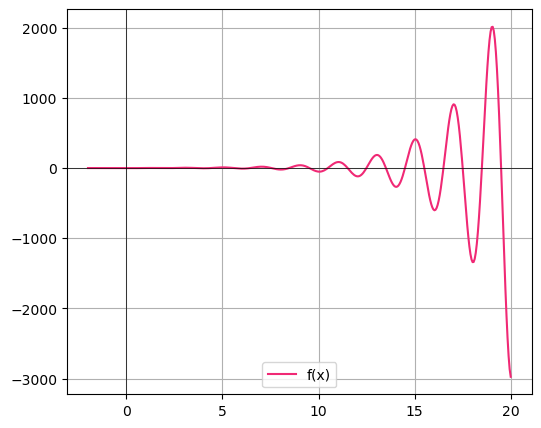

Raíz aproximada: p = 0.45065674789059323 con n = 1
Raíz aproximada: p = 1.7447380533683496 con n = 2
Raíz aproximada: p = 2.2383197950741383 con n = 3
Raíz aproximada: p = 3.709041201375952 con n = 4
Raíz aproximada: p = 4.322648959394466 con n = 5
Raíz aproximada: p = 5.619935330897348 con n = 6
Raíz aproximada: p = 6.406933614179465 con n = 7
Raíz aproximada: p = 7.5632105298048415 con n = 8
Raíz aproximada: p = 8.453480976980412 con n = 9
Raíz aproximada: p = 9.531833533481178 con n = 10
Raíz aproximada: p = 10.477305887176216 con n = 11
Raíz aproximada: p = 11.515570723125352 con n = 12
Raíz aproximada: p = 12.489106412447065 con n = 13
Raíz aproximada: p = 13.507471405108609 con n = 14
Raíz aproximada: p = 14.494831050995868 con n = 15
Raíz aproximada: p = 15.503539134886033 con n = 16
Raíz aproximada: p = 16.497568337549417 con n = 17
Raíz aproximada: p = 17.50166147499906 con n = 18
Raíz aproximada: p = 18.49886352880028 con n = 19
Raíz aproximada: p = 19.500774932317764 con n =

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton

def f(x):
    return np.log(x**2 + 1) - np.exp(0.4 * x) * np.cos(np.pi * x)

def fprime(x):
    return (2 * x) / (x**2 + 1) - 0.4 * np.exp(0.4 * x) * np.cos(np.pi * x) + np.pi * np.exp(0.4 * x) * np.sin(np.pi * x)

x0, x1 = -1, 0
tolerancia = 1e-6
raiz_neg = newton(f, x0=x0, x1=x1, tol=tolerancia)
print(f"El cero negativo aproximado usando secante es x ≈ {raiz_neg}")

raiz_1 = newton(f, x0=0, x1=0.5, tol=tolerancia)
raiz_2 = newton(f, x0=1, x1=1.5, tol=tolerancia)
raiz_3 = newton(f, x0=2, x1=2.5, tol=tolerancia)
raiz_4 = newton(f, x0=3, x1=4, tol=tolerancia)
print(f"Los cuatro ceros positivos más pequeños son:\n"
      f"x₁ ≈ {raiz_1}\n"
      f"x₂ ≈ {raiz_2}\n"
      f"x₃ ≈ {raiz_3}\n"
      f"x₄ ≈ {raiz_4}")

x = np.linspace(-2, 20, 400)
y = np.log(x**2 + 1) - np.exp(0.4 * x) * np.cos(np.pi * x)
plt.figure(figsize=(6, 5))
plt.plot(x, y, color="#F02975", label="f(x)")
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.grid(True)
plt.show()

roots = []
for n in range(1, 21):
    p0 = n - 0.5
    ans = newton(f, x0=p0, fprime=fprime, tol=1e-6)
    roots.append((n, ans))
for n, root in roots:
    print(f"Raíz aproximada: p = {root} con n = {n}")

n = 25
p0 = n - 0.5
ans = newton(f, x0=p0, fprime=fprime, tol=1e-6)
print(f"Raíz aproximada: p = {ans} con n = {n}")



---

7. La función $f(x) = x^{\frac{1}{3}}$ tiene raiz en $x=0$. Usando el punto de inicio de $x=1$ y $p_0 = 5$, $p_1 = 0.5$ para el método de secante, compare los resultados de los métods de la secante y de newton.



In [7]:
import numpy as np
from scipy.optimize import newton

def f(x):
    return np.cbrt(x) 

def fprime(x):
    return (1/3) * np.power(x, -2/3)

try:
    resultado_newton = newton(f, fprime=fprime, x0=1, maxiter=50)
    print(f"Resultado con Newton (x₀=1): {resultado_newton}")
except Exception as e:
    print(f"No converge con Newton: {e}")

try:
    resultado_secante = newton(f, x0=5, x1=0.5, maxiter=50)
    print(f"Resultado con Secante (p₀=5, p₁=0.5): {resultado_secante}")
except Exception as e:
    print(f"No converge con Secante: {e}")


No converge con Newton: Failed to converge after 50 iterations, value is nan.
No converge con Secante: Failed to converge after 50 iterations, value is 0.15125956067017968.


C:\Users\hp\AppData\Local\Temp\ipykernel_18404\2527226999.py:8: RuntimeWarning: invalid value encountered in power
  return (1/3) * np.power(x, -2/3)
